# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df = pd.read_csv('hotel_booking.csv')

# Exploratory Data Analysis and Data Cleaning

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  str    
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  str    
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal                       

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='str')

In [6]:
# reservation_status_date is in object format, we need to convert it to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [7]:
type(df['reservation_status_date'][0])

pandas.Timestamp

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  str           
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  str           
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64       
 11

In [9]:
df.describe(include = 'object') # to get the count of unique values in each categorical column

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************3627
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [10]:
for col in df.describe(include = 'object').columns:
    print(col)
    print(df[col].unique())
    print('----'*50)

hotel
<ArrowStringArray>
['Resort Hotel', 'City Hotel']
Length: 2, dtype: str
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
arrival_date_month
<ArrowStringArray>
[     'July',    'August', 'September',   'October',  'November',  'December',
   'January',  'February',     'March',     'April',       'May',      'June']
Length: 12, dtype: str
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
meal
<ArrowStringArray>
['BB', 'FB', 'HB', 'SC', 'Undefined']
Length: 5, dtype: str
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
country
<ArrowSt

In [11]:
df.isnull().sum() # to check for missing values in the dataset

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [12]:
df.drop(['company', 'agent'], axis = 1, inplace = True) # dropping company and agent columns as they have more than 90% missing values
# axis = 1 is used to drop columns, if we want to drop rows we can use axis = 0

df.dropna(inplace = True) # dropping the remaining rows with missing values

In [13]:
df.describe() # to get the count of unique values in each numerical column. if we add include = 'object' it will give us the count of unique values in each categorical column

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


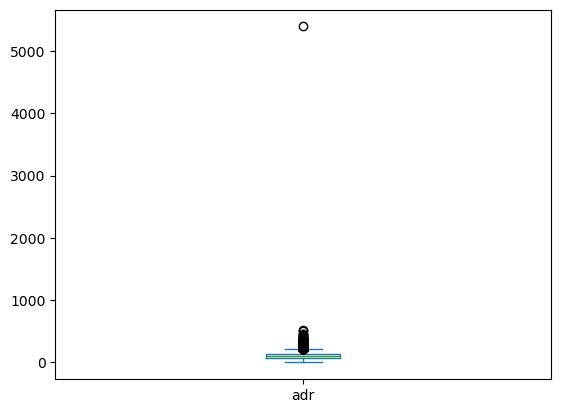

In [14]:
# can see adr value is -6 and it doesn't make sense, even max is 5400 which is very high, so we can say that we got some outliers in adr column
# adr is average daily rate, so it should be a positive value and it should not be -ve

df['adr'].plot(kind = 'box') # can see we got some outliers in adr column
plt.show()

# hence we need to remove the outliers from adr column, we can use IQR method to remove the outliers

df = df[(df['adr'] > 0) & (df['adr'] < 5000)] # removing the rows where adr is less than or equal to 0 and greater than 95th percentile value of adr column

In [15]:
df.describe() # check if outliers are removed or not, we can see that now min value is 0.0 and max value is 510.0 which is reasonable for adr column

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958.000000,116958
mean,0.375767,105.376879,2016.161443,27.138109,15.805050,0.937687,2.522974,1.862438,0.104824,0.007866,0.027959,0.086963,0.119795,0.216505,2.347373,103.649070,0.061997,0.571273,2016-07-31 01:23:52.206433
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.260000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,709.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.484322,106.944356,0.706509,13.561162,8.783049,0.993329,1.885574,0.481129,0.400296,0.097102,0.164855,0.850186,1.432435,0.633569,17.712061,46.646454,0.244426,0.791495,NaN


# Data Analysis and Visualizations

## Reservation Status Count

is_canceled
0    62.423263
1    37.576737
Name: proportion, dtype: float64


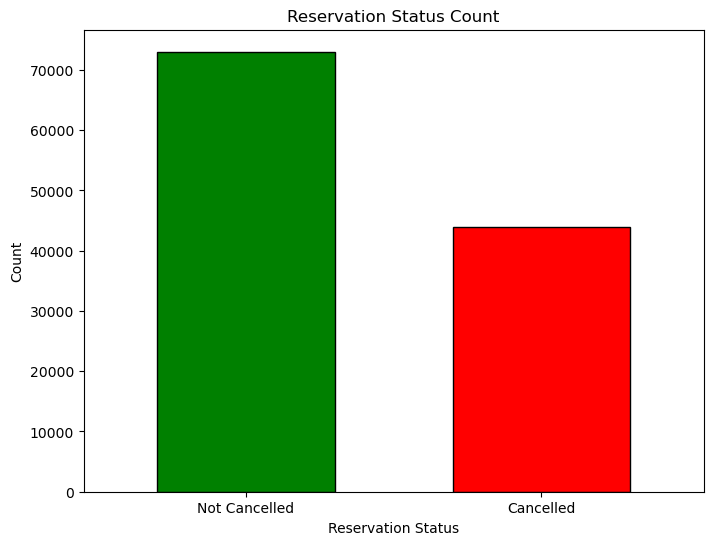

In [16]:
cancelled_percentage = df['is_canceled'].value_counts(normalize=True) * 100 # normalize=True will give us the percentage of each category in the is_canceled column
print(cancelled_percentage)

# we can see that 37.5% of the bookings are cancelled and 62.5% of the bookings are not cancelled

df_cancelled_counts = df['is_canceled'].value_counts()
df_cancelled_counts.plot(kind='bar', color=['green', 'red'], figsize=(8,6), edgecolor='black', width=0.6)
plt.title('Reservation Status Count')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Cancelled', 'Cancelled'], rotation=0)
plt.show()

#### The analysis shows that approximately 37.6% of total bookings were cancelled, indicating a high cancellation rate. This significantly impacts hotel revenue, occupancy forecasting, and operational efficiency. Further analysis is required to identify the underlying factors contributing to cancellations.

## Cancellation Rates Comparison between Resort Hotel and City Hotel

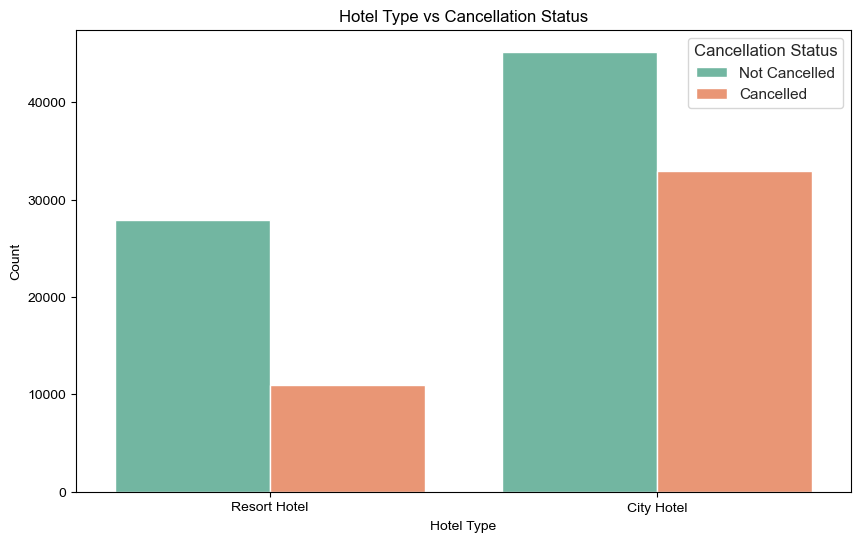

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.set_theme(style='ticks')

sns.countplot(x='hotel', hue='is_canceled', data=df, ax=ax, palette='Set2')
ax.set_title('Hotel Type vs Cancellation Status')
ax.set_xlabel('Hotel Type')
ax.set_ylabel('Count')
ax.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.show()

In [32]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel_counts =resort_hotel['is_canceled'].value_counts(normalize=True) * 100
print(resort_hotel_counts)

print('---'*50)

city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel_count = city_hotel['is_canceled'].value_counts(normalize=True) * 100
print(city_hotel_count)

is_canceled
0    71.70394
1    28.29606
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
is_canceled
0    57.805918
1    42.194082
Name: proportion, dtype: float64


#### The analysis reveals that City Hotel has a significantly higher cancellation rate (42.19%) compared to Resort Hotel (28.30%). This indicates that the cancellation issue is more severe in City Hotels. The difference may be attributed to variations in customer type, booking behavior, and travel purpose. Strategic interventions should primarily focus on reducing cancellations in City Hotels to improve overall revenue performance.

In [20]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

## ADR in City and Resort Hotel

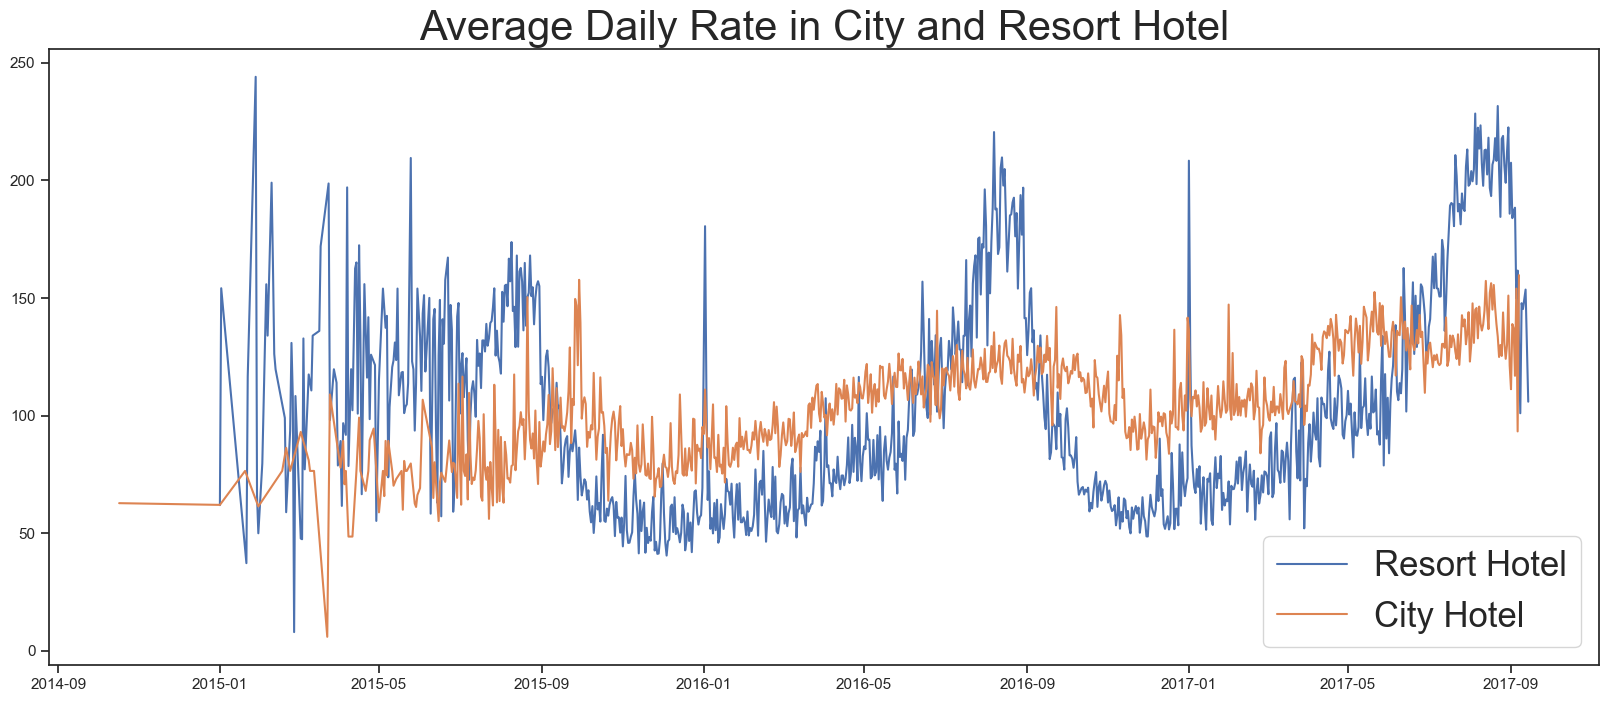

In [21]:
plt.figure(figsize=(20, 8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize= 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 25)
plt.show()

#### The analysis of Average Daily Rate (ADR) reveals that Resort Hotels exhibit significant seasonal price fluctuations, particularly during peak travel months, indicating strong demand seasonality. In contrast, City Hotels maintain relatively stable pricing trends. Despite higher ADR volatility, Resort Hotels show lower cancellation rates, suggesting that pricing may not be the primary driver of cancellations in City Hotels. Further analysis is required to examine other contributing factors such as lead time and market segment.

## Reservation Status Per Month

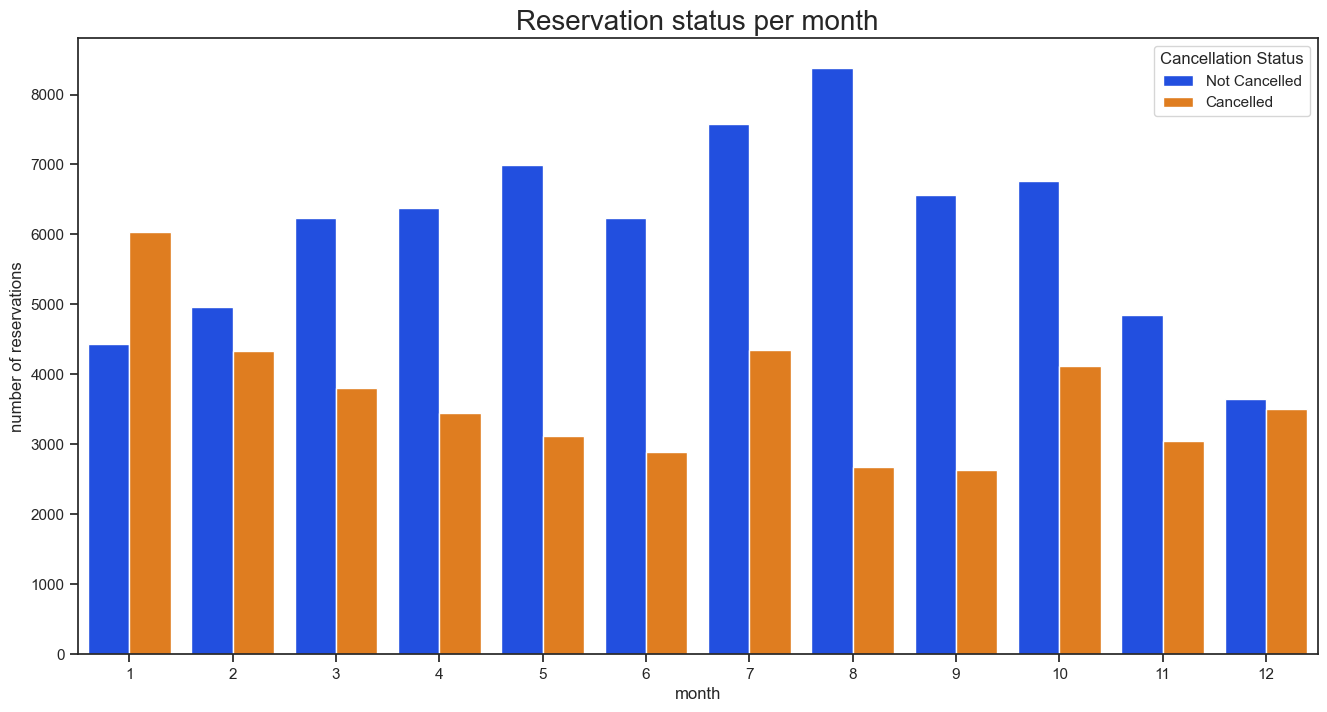

In [22]:
df['month'] = df['reservation_status_date'].dt.month

fig, ax = plt.subplots(figsize=(16,8))

sns.set_theme(style='ticks')

sns.countplot(x='month', hue='is_canceled', data=df, ax=ax, palette='bright')
ax.legend(title='Cancellation Status', labels=['Not Cancelled', 'Cancelled'])
plt.title('Reservation status per month', size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.show()


#### The monthly analysis reveals strong seasonality in hotel bookings, with peak demand observed between June and August. Cancellation volumes increase during high-demand months; however, January shows a relatively high proportion of cancellations compared to confirmed bookings. This indicates that both peak and off-peak seasons require different strategic approaches to minimize revenue loss.

## Average Daily Rate Per month

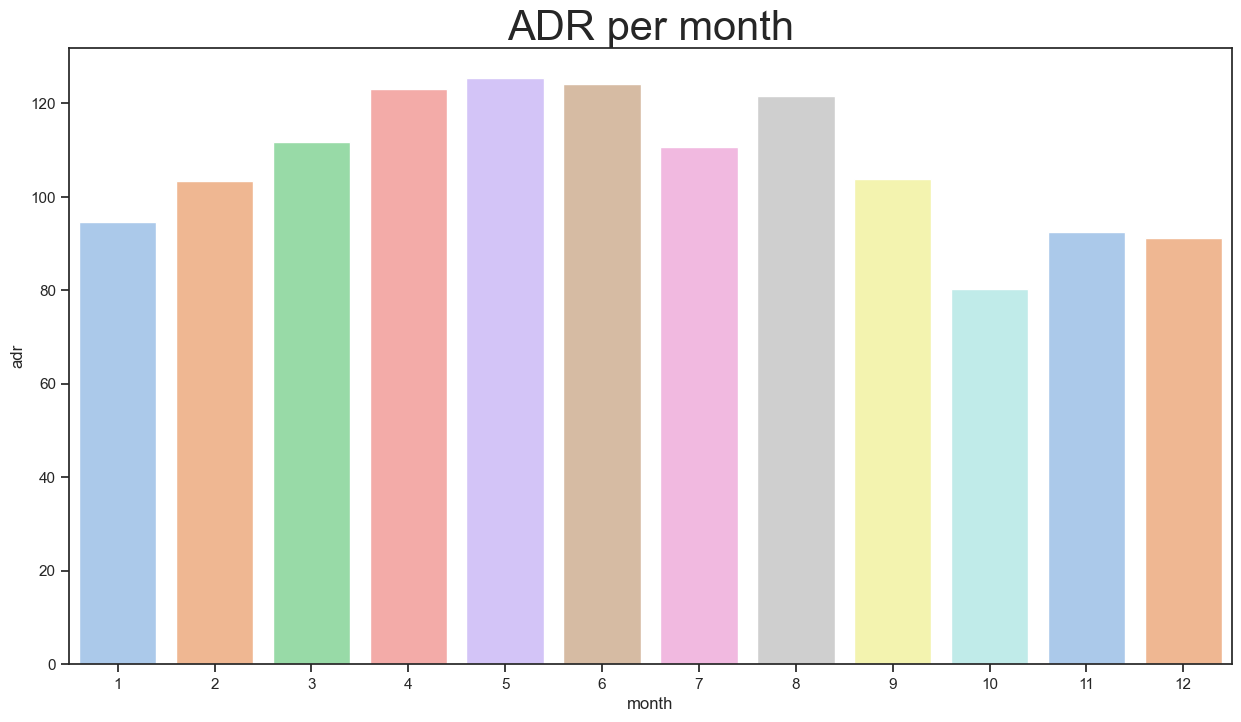

In [34]:
plt.figure(figsize=(15, 8))

plt.title('ADR per month', fontsize = 30)
sns.barplot(x='month', y='adr', data = df[df["is_canceled"] == 1].groupby('month')[['adr']].mean().reset_index(),palette='pastel')
plt.show()

#### The monthly ADR analysis reveals a clear seasonal pricing pattern, with peak rates observed during May and June, and the lowest rates recorded in October. This indicates that hotel pricing strategy is demand-driven. High-value months require stricter cancellation management to protect revenue, while low-value months should focus on occupancy maximization strategies.

## ADR Trend — Cancelled vs Not Cancelled Bookings

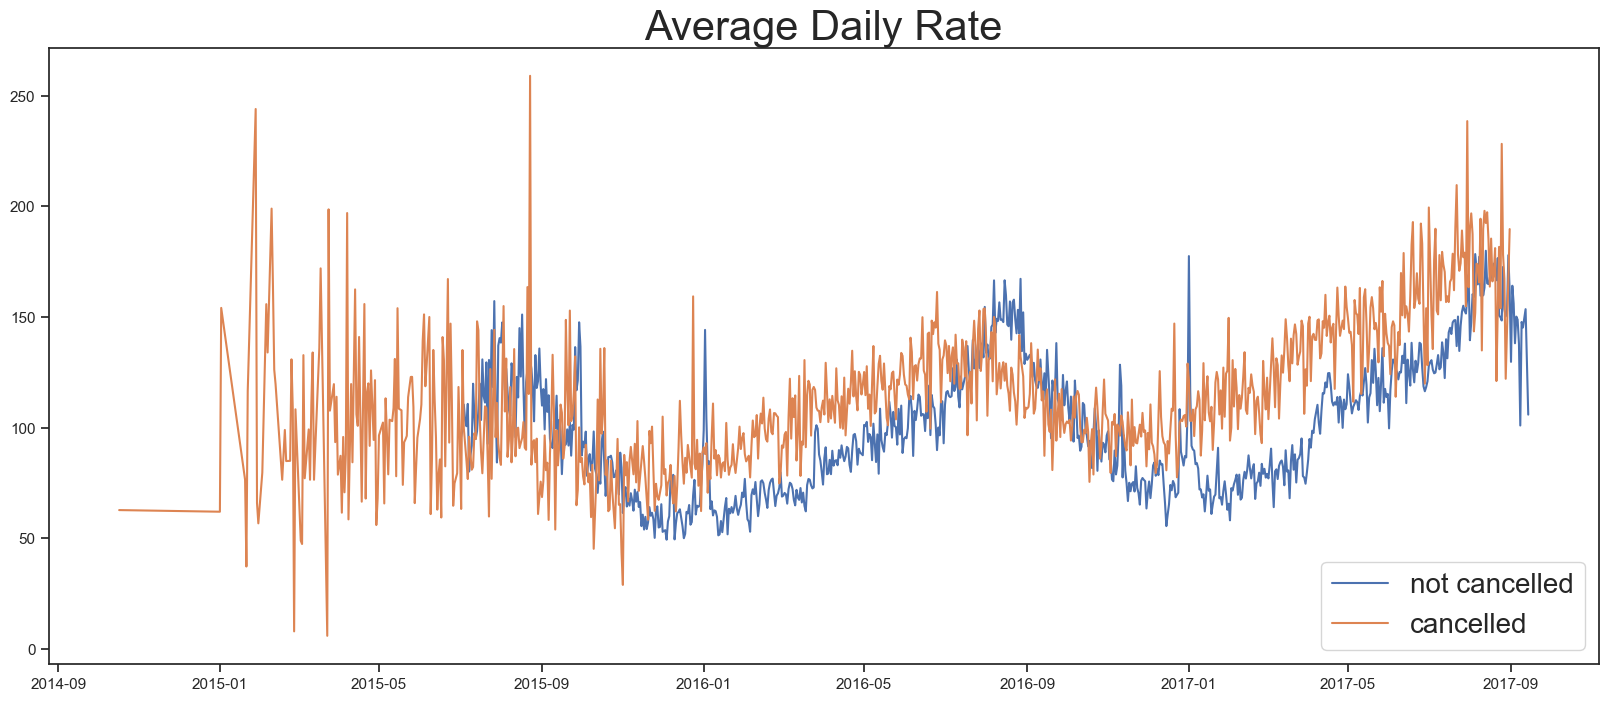

In [38]:
cancelled_data = df[df['is_canceled'] == 1]
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values(by='reservation_status_date', inplace=True)

not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values(by='reservation_status_date', inplace=True)

plt.figure(figsize= (20, 8))
plt.title('Average Daily Rate', fontsize = 30)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

# Data is less in 2015 and less after 2017 too. So it will bring too much inconsistency, hence will filter out those and will check only fro 2016 to september 2017

#### Data is less in 2015 and less after 2017 too. So it will bring too much inconsistency, hence will filter out those and will check only for 2016 to september 2017

In [29]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date'] > '2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]


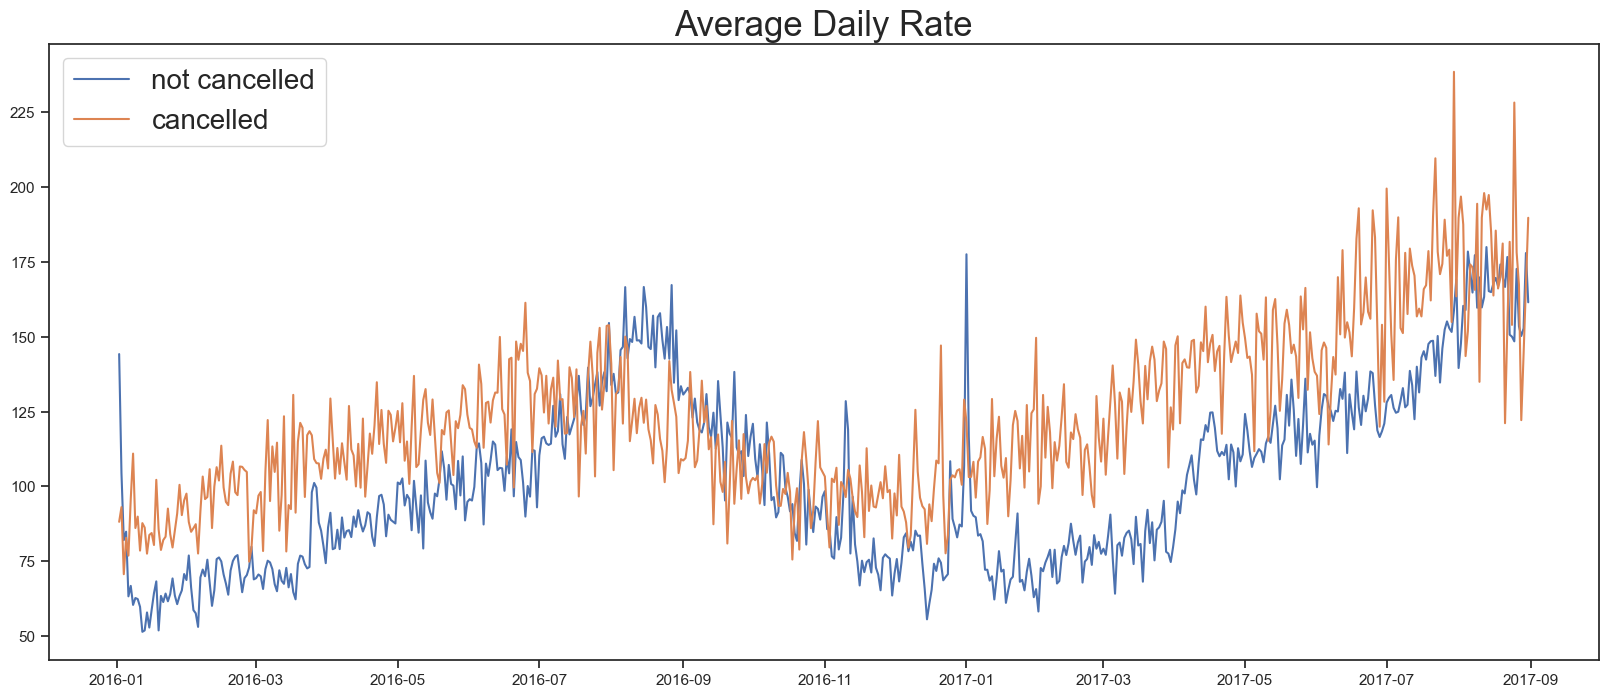

In [30]:
plt.figure(figsize= (20, 8))
plt.title('Average Daily Rate', fontsize = 25)
plt.plot(not_cancelled_df_adr['reservation_status_date'], not_cancelled_df_adr['adr'], label = 'not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

#### After filtering incomplete periods and focusing on 2016 to September 2017, the ADR trend reveals that cancelled bookings consistently exhibit higher average daily rates compared to non-cancelled bookings. This suggests a positive relationship between price and cancellation probability, indicating potential price sensitivity among customers.

## Lead Time Distribution by Cancellation Status

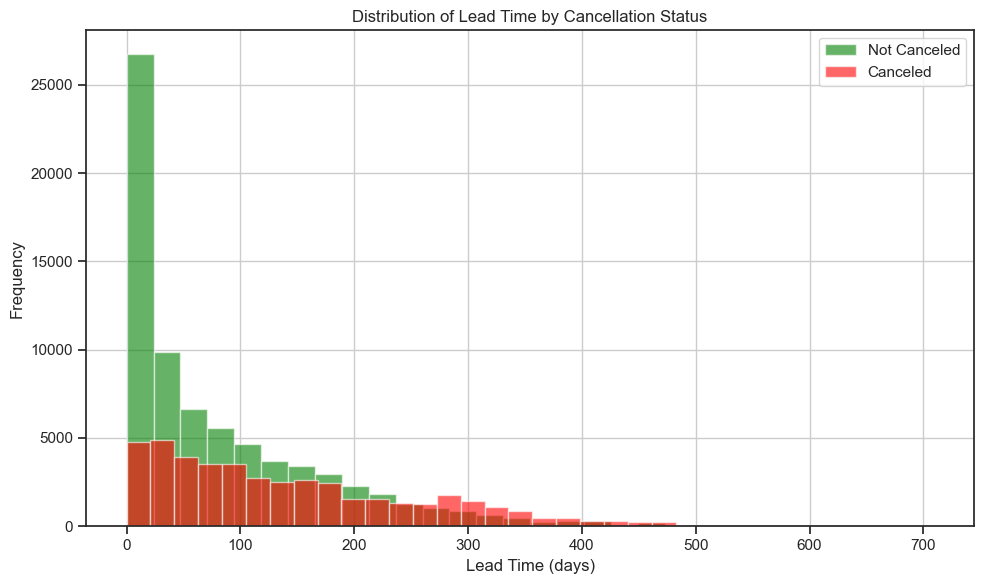

In [39]:
plt.figure(figsize=(10,6))
plt.hist(df[df["is_canceled"]==0]["lead_time"], bins=30, color='green', alpha=0.6, label='Not Canceled')
plt.hist(df[df["is_canceled"]==1]["lead_time"], bins=30, color='red', alpha=0.6, label='Canceled')
plt.title('Distribution of Lead Time by Cancellation Status')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### The lead time distribution analysis reveals a strong positive relationship between lead time and cancellation probability. Bookings made far in advance exhibit a significantly higher likelihood of cancellation compared to last-minute reservations. This indicates that lead time is a critical driver of booking uncertainty and revenue risk.

## Cancellation Rate By Lead Time Bucket

In [ ]:
df['lead_time_bucket'] = pd.qcut(df['lead_time'], 4) # This splits lead_time into 4 equal-sized groups (quartiles). like 0-750 will be divided into 4 quarters
pd.crosstab(df['lead_time_bucket'], df['is_canceled'], normalize='index') * 100 # This will show cancellation percentage for each lead time group.

is_canceled,0,1
lead_time_bucket,,
"(-0.001, 19.0]",84.528263,15.471737
"(19.0, 71.0]",63.620213,36.379787
"(71.0, 162.0]",56.941877,43.058123
"(162.0, 709.0]",44.371066,55.628934


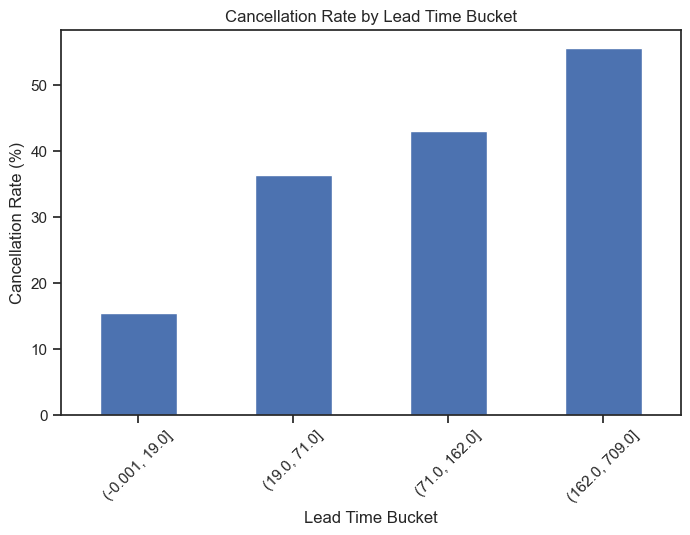

In [42]:
lead_cancel_rate = (
    df.groupby('lead_time_bucket')['is_canceled']
    .mean() * 100
)

lead_cancel_rate.plot(kind='bar', figsize=(8,5))
plt.title('Cancellation Rate by Lead Time Bucket')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Lead Time Bucket')
plt.xticks(rotation=45)
plt.show()

#### The analysis reveals a strong positive relationship between lead time and cancellation probability. Bookings made within 0–19 days show a cancellation rate of only 15%, whereas bookings made more than 162 days in advance exhibit a cancellation rate exceeding 55%. This indicates that long lead-time reservations pose a significant revenue risk and require targeted management strategies.

## Market Segment Cancellation Analysis

In [37]:
market_segment = df['market_segment'].value_counts()
print(market_segment)

print('--'*50)

normalised_market_segment = df['market_segment'].value_counts(normalize=True) * 100
print(normalised_market_segment)

print('--'*50)
cancelled_market_segment = df[df['is_canceled'] == 1]['market_segment'].value_counts(normalize=True) * 100
print(cancelled_market_segment)


market_segment
Online TA        56036
Offline TA/TO    23829
Groups           19554
Direct           12210
Corporate         5035
Aviation           231
Complementary       63
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
market_segment
Online TA        47.911216
Offline TA/TO    20.373980
Groups           16.718822
Direct           10.439645
Corporate         4.304964
Aviation          0.197507
Complementary     0.053865
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
market_segment
Online TA        47.141004
Groups           27.470477
Offline TA/TO    18.746729
Direct            4.298164
Corporate         2.216205
Aviation          0.116044
Complementary     0.011377
Name: proportion, dtype: float64


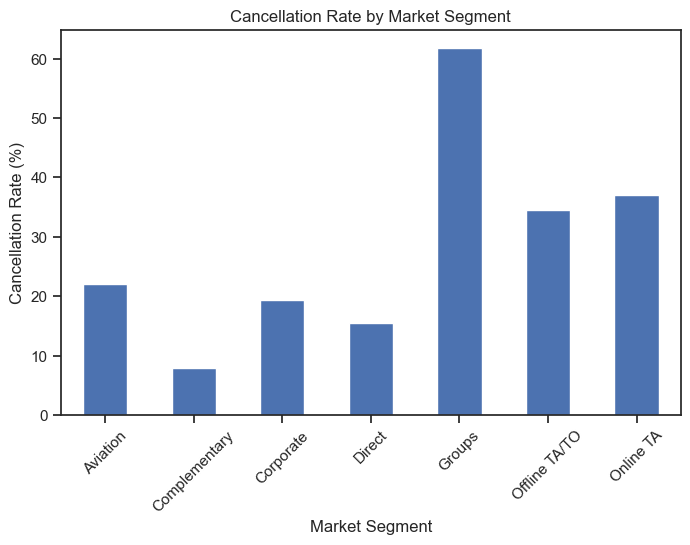

In [44]:
pd.crosstab(df['market_segment'], df['is_canceled'], normalize='index') * 100
cancelled_market_segment = (
    df.groupby('market_segment')['is_canceled']
    .mean() * 100
)

cancelled_market_segment.plot(kind='bar', figsize=(8,5))
plt.title('Cancellation Rate by Market Segment')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()


# Final Summary 

#### The analysis reveals that cancellation behavior is primarily driven by lead time and market segment. Bookings made far in advance exhibit significantly higher cancellation rates, exceeding 55% for long lead times. Additionally, group bookings show an exceptionally high cancellation rate of over 60%. Pricing also influences cancellation probability, as higher ADR bookings demonstrate increased cancellation likelihood. Strategic interventions should focus on managing long lead-time reservations and high-risk segments to improve revenue stability.